In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc


In [2]:
df = pd.read_csv("clean_data.csv")
df.head()


,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,name,dep_sched_datetime,is_long_flight,is_delayed
0,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,United Air Lines Inc.,2013-01-01 05:15:00,False,True
1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,United Air Lines Inc.,2013-01-01 05:15:00,False,True
2,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,American Airlines Inc.,2013-01-01 05:15:00,False,True
3,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,JetBlue Airways,2013-01-01 05:15:00,False,False
4,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,Delta Air Lines Inc.,2013-01-01 06:15:00,False,False


### Подготовка к обучению моделей

In [3]:
X = df[['carrier', 'origin', 'dest', 'sched_dep_time', 'sched_arr_time', 'distance', 'air_time']]

# Perform one-hot encoding for categorical variables (carrier, origin, dest)
X = pd.get_dummies(X, columns=['carrier', 'origin', 'dest'], drop_first=False)

X

,sched_dep_time,sched_arr_time,distance,air_time,carrier_9E,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_EV,...,dest_SNA,dest_SRQ,dest_STL,dest_STT,dest_SYR,dest_TPA,dest_TUL,dest_TVC,dest_TYS,dest_XNA
0,515,819,1400,227.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,529,830,1416,227.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,540,850,1089,160.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,545,1022,1576,183.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,600,837,762,116.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327299,2245,2351,209,41.0,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
327300,2250,7,301,52.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
327301,2246,1,264,47.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
327302,2255,2358,187,33.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, df.is_delayed, test_size=0.2, random_state=12)

### К-ближайших соседей (KNN)

In [5]:
model_KNN = KNeighborsClassifier()
KNN_params= {"n_neighbors": [2, 3, 4, 5]}
grid_search_KNN = GridSearchCV(model_KNN, KNN_params, cv=5, n_jobs=-1)
grid_search_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5]})

#### Оценка качества

In [6]:
best_model_KNN = grid_search_KNN.best_estimator_
best_params_KNN = grid_search_KNN.best_params_
best_score_KNN = grid_search_KNN.best_score_
pred_KNN = best_model_KNN.predict(X_test)
cm_KNN = confusion_matrix(y_test, pred_KNN)
print(f"best params: {best_params_KNN}")
print(f"best score: {best_score_KNN}")
print(f"Train score: {best_model_KNN.score(X_train, y_train)}")
print(f"Test score: {best_model_KNN.score(X_test, y_test)}")
print(f"Confusion_matrix:\n{confusion_matrix(y_test, pred_KNN)}")
print(f"Precision, recall and f1-score:\n{classification_report(y_test, pred_KNN, target_names=['On-Time', 'Delayed'])}")
print(f"ROC-AUC score: {roc_auc_score(y_test, best_model_KNN.predict_proba(X_test)[:, 1])}")
print(f"CV_results: {pd.DataFrame(grid_search_KNN.cv_results_)}")

best params: {'n_neighbors': 4}
best score: 0.6737778071314746
Train score: 0.7725316315502038
Test score: 0.6719420723789737
Confusion_matrix:
[[33189  5687]
 [15788 10797]]
Precision, recall and f1-score:
              precision    recall  f1-score   support

     On-Time       0.68      0.85      0.76     38876
     Delayed       0.65      0.41      0.50     26585

    accuracy                           0.67     65461
   macro avg       0.67      0.63      0.63     65461
weighted avg       0.67      0.67      0.65     65461
ROC-AUC score: 0.6929958004813963
CV_results:    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.770973      0.071058       157.121383        1.446880   
1       0.775974      0.050823       158.029281        1.382384   
2       0.444900      0.165609       140.341487       14.509059   
3       0.360081      0.020400       128.650768        0.381590   

  param_n_neighbors              params  split0_test_score  split1_test_score  \
0   

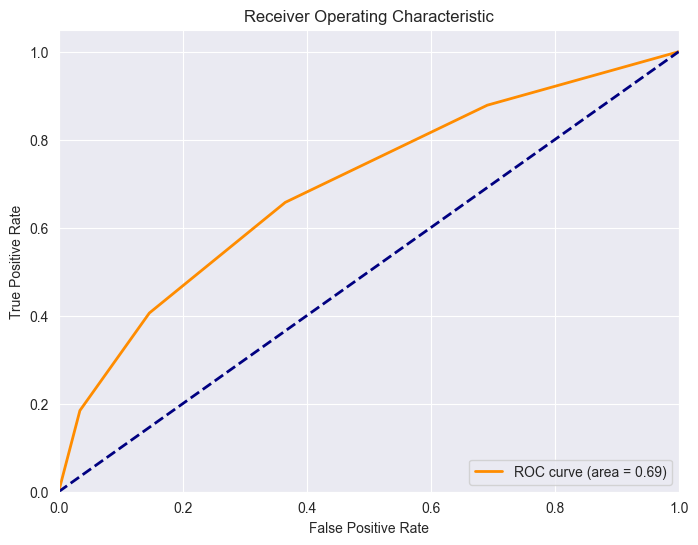

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, best_model_KNN.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


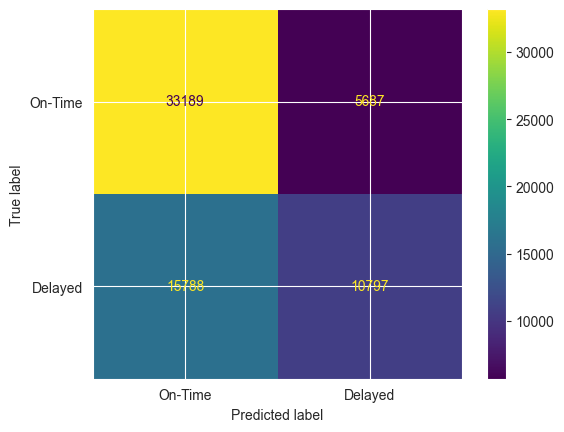

In [8]:
ConfusionMatrixDisplay(confusion_matrix=cm_KNN, display_labels=['On-Time', 'Delayed']).plot()

### Машина опорных векторов (SVM)

In [9]:
param_grid = {
    'C': [0.1, 1, 10, 100],
}

svm = LinearSVC(random_state=12) 
grid_search_SVM = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_SVM.fit(X_train, y_train)

D:\Python\ML\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\Python\ML\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LinearSVC(random_state=12), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='accuracy')

In [10]:
best_model_SVM = grid_search_SVM.best_estimator_
best_params_SVM = grid_search_SVM.best_params_
best_score_SVM = grid_search_SVM.best_score_
pred_SVM = best_model_SVM.predict(X_test)
cm_SVM = confusion_matrix(y_test, pred_SVM)
print(f"best params: {best_params_SVM}")
print(f"best score: {best_score_SVM}")
print(f"Train score: {best_model_SVM.score(X_train, y_train)}")
print(f"Test score: {best_model_SVM.score(X_test, y_test)}")
print(f"Confusion_matrix:\n{confusion_matrix(y_test, pred_SVM)}")
print(f"Precision, recall and f1-score:\n{classification_report(y_test, pred_SVM, target_names=['On-Time', 'Delayed'])}")
print(f"ROC-AUC score: {roc_auc_score(y_test, best_model_SVM.decision_function(X_test))}")
print(f"CV_results: {pd.DataFrame(grid_search_SVM.cv_results_)}")


best params: {'C': 1}
best score: 0.62340811930489
Train score: 0.6440118697081839
Test score: 0.64287132796627
Confusion_matrix:
[[35780  3096]
 [20282  6303]]
Precision, recall and f1-score:
              precision    recall  f1-score   support

     On-Time       0.64      0.92      0.75     38876
     Delayed       0.67      0.24      0.35     26585

    accuracy                           0.64     65461
   macro avg       0.65      0.58      0.55     65461
weighted avg       0.65      0.64      0.59     65461

ROC-AUC score: 0.6732136714810106
CV_results:    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      84.801065      0.692648         0.063614        0.006345     0.1   
1      85.857102      0.785880         0.060613        0.005679       1   
2      72.678831      9.646233         0.046011        0.012524      10   
3      63.376068      0.077655         0.043411        0.004884     100   

       params  split0_test_score  split1_test_score  split

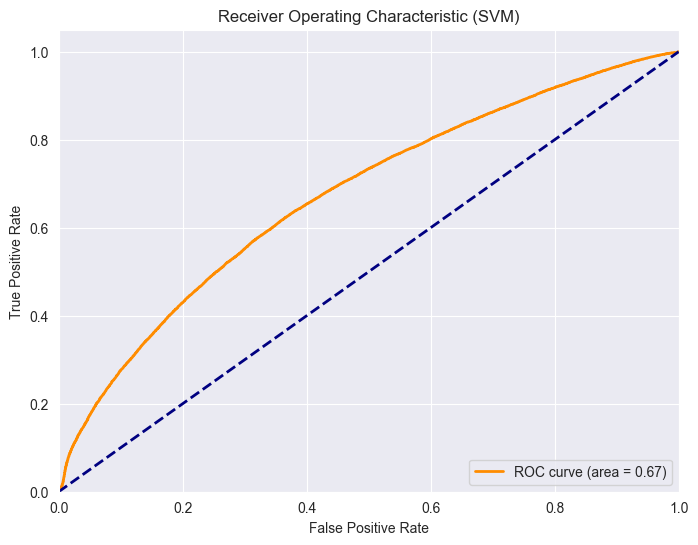

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, best_model_SVM.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc='lower right')
plt.show()


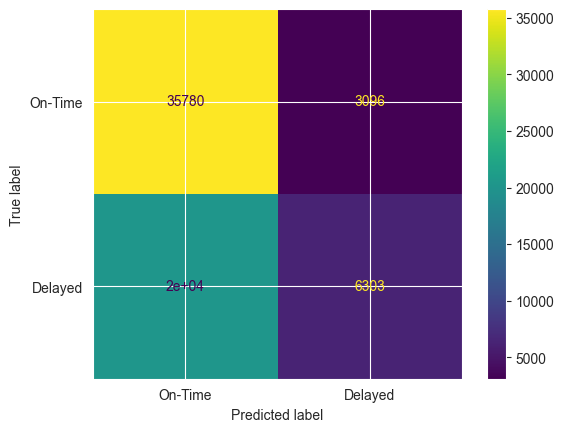

In [17]:
ConfusionMatrixDisplay(confusion_matrix=cm_SVM, display_labels=['On-Time', 'Delayed']).plot()

### Случайный лес (Random Forest)

In [12]:
rf = RandomForestClassifier(random_state=12)

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
}

grid_search_RF = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 150]},
             scoring='accuracy')

In [13]:
best_model_RF = grid_search_RF.best_estimator_
best_params_RF = grid_search_RF.best_params_
best_score_RF = grid_search_RF.best_score_
print(f"best params: {best_params_RF}")
print(f"best score: {best_score_RF}")
pred_RF = best_model_RF.predict(X_test)
cm_RF = confusion_matrix(y_test, pred_RF)
print(f"Confusion_matrix:\n{confusion_matrix(y_test, pred_RF)}")
print(f"Precision, recall, and f1-score:\n{classification_report(y_test, pred_RF, target_names=['On-Time', 'Delayed'])}")
print(f"ROC-AUC score: {roc_auc_score(y_test, best_model_RF.predict_proba(X_test)[:, 1])}")


best params: {'max_depth': 20, 'n_estimators': 100}
best score: 0.6817902474465886
Confusion_matrix:
[[33035  5841]
 [15199 11386]]
Precision, recall, and f1-score:
              precision    recall  f1-score   support

     On-Time       0.68      0.85      0.76     38876
     Delayed       0.66      0.43      0.52     26585

    accuracy                           0.68     65461
   macro avg       0.67      0.64      0.64     65461
weighted avg       0.68      0.68      0.66     65461
ROC-AUC score: 0.7244640598872322


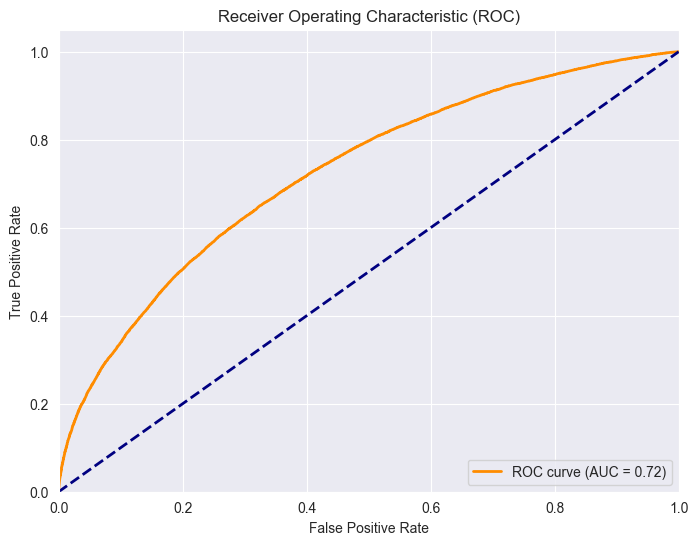

In [14]:
y_pred_prob = best_model_RF.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

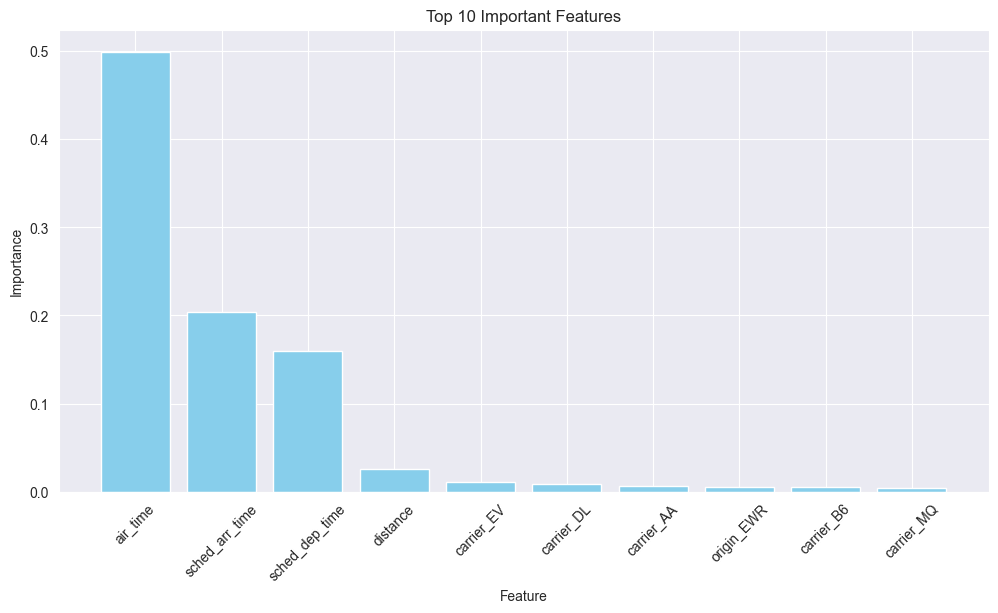

In [16]:
feature_importances = best_model_RF.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_n = 10

plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f'Top {top_n} Important Features')
plt.xticks(rotation=45)
plt.show()

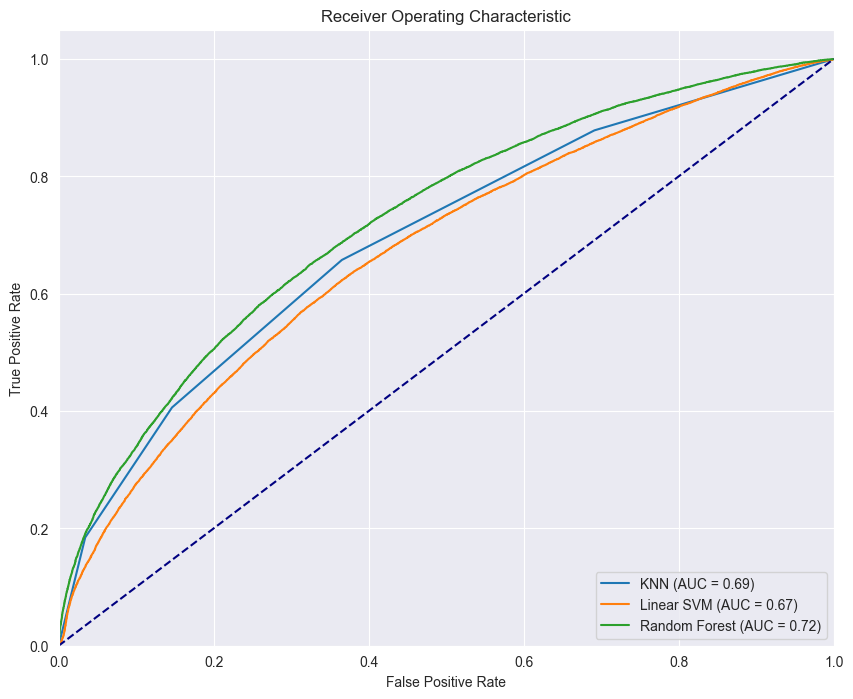

In [18]:
plt.figure(figsize=(10, 8))

# Calculate and plot ROC curve for each model
for model, label in zip([best_model_KNN, best_model_SVM, best_model_RF], 
                         ['KNN', 'Linear SVM', 'Random Forest']):
    y_score = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot 45-degree line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()


<Figure size 1000x600 with 0 Axes>

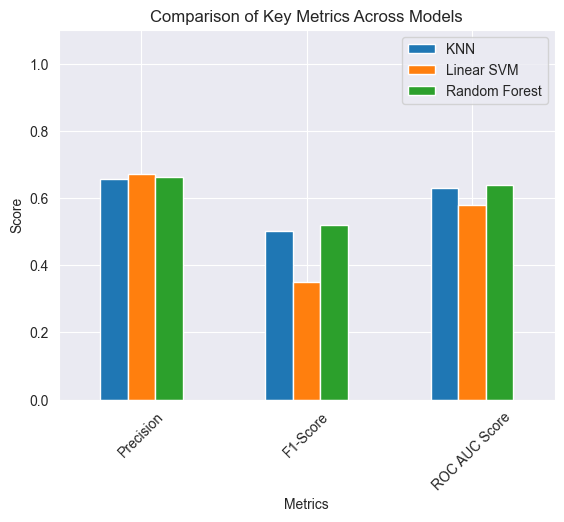

In [19]:
# Assume these are your existing variables with predicted labels or probabilities
# pred_KNN, pred_SVM, pred_RF
true_labels = y_test

# Calculate metrics using your existing variables
precision_knn = precision_score(true_labels, pred_KNN)
precision_svm = precision_score(true_labels, pred_SVM)
precision_rf = precision_score(true_labels, pred_RF)

f1_knn = f1_score(true_labels, pred_KNN)
f1_svm = f1_score(true_labels, pred_SVM)
f1_rf = f1_score(true_labels, pred_RF)

roc_auc_knn = roc_auc_score(true_labels, pred_KNN)
roc_auc_svm = roc_auc_score(true_labels, pred_SVM)
roc_auc_rf = roc_auc_score(true_labels, pred_RF)

# Prepare data for bar plot
data = {
    'Metrics': ['Precision', 'F1-Score', 'ROC AUC Score'],
    'KNN': [precision_knn, f1_knn, roc_auc_knn],
    'Linear SVM': [precision_svm, f1_svm, roc_auc_svm],
    'Random Forest': [precision_rf, f1_rf, roc_auc_rf]
}

df_metrics = pd.DataFrame(data)

# Create bar plot
plt.figure(figsize=(10, 6))
ax = df_metrics.plot.bar(x='Metrics', y=['KNN', 'Linear SVM', 'Random Forest'], rot=0)
plt.title('Comparison of Key Metrics Across Models')
plt.ylabel('Score')
plt.ylim([0, 1.1])
plt.xticks(rotation=45)
plt.show()
